In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import SpectralClustering

In [2]:
tech_env_data_df = pd.read_csv("./tech_env_dataset.csv")

In [3]:
tech_env_data_df = tech_env_data_df.rename(columns={"Unnamed: 0":"Index"})

In [4]:
for col in tech_env_data_df.columns:
    print(col)

Index
State
Area (Sq Mi)
Area (Sq Km)
Land (Sq Mi)
Land (Sq Km)
Land (%)
Water (Sq Mi)
Water (Sq Km)
Water (%)
population_2010
population_2011
population_2012
population_2013
population_2014
population_2015
population_2016
population_2017
population_2018
population_2019
state_funds_2012
fed_funds_2012
total_spent_2012
state_funds_2013
fed_funds_2013
total_spent_2013
state_funds_2014
fed_funds_2014
total_spent_2014
per_capita_2014
state_funds_2015
fed_funds_2015
total_spent_2015
per_capita_2015
state_funds_2016
fed_funds_2016
total_spent_2016
per_capita_2016
state_funds_2017
fed_funds_2017
total_spent_2017
per_capita_2017
desktop_use_2011
desktop_use_2013
desktop_use_2015
desktop_use_2017
desktop_use_2019
laptop_use_2011
laptop_use_2013
laptop_use_2015
laptop_use_2017
laptop_use_2019
tablet_use_2011
tablet_use_2013
tablet_use_2015
tablet_use_2017
tablet_use_2019
mobile_use_2011
mobile_use_2013
mobile_use_2015
mobile_use_2017
mobile_use_2019
smartTV_use_2011
smartTV_use_2013
smartTV_use_

In [5]:
def state_to_index(state):
    row = tech_env_data_df.loc[tech_env_data_df['State'] == state]
    return row.Index.values[0]

In [6]:
state_to_index('California')

4

In [7]:
law_data_df = pd.read_csv("./WebScrape/pew_bb_law_data.csv")

In [8]:
law_data_df = law_data_df.rename(columns={"Unnamed: 0":"Index"})

In [9]:
law = law_data_df[law_data_df["Index"] == 1]
law_data_df.head()

,Index,Header,State,Year,Title,Category,Topic,Summary,StateCode
0,0,Ala. Code 37-16-1 et seq.,Alabama,2019,Broadband Using Electric Easements Accessibili...,Category: Competition and regulation,Topic: Cooperatives,Allows electric utilities to also provide broa...,(a) To the extent not otherwise authorized by ...
1,1,Ala. Code 37-16-2,Alabama,2019,Broadband Using Electric Easements Accessibili...,Category: Other,Topic: Legislative intent,Declares that the state intends to encourage t...,(a) The Legislature finds and declares the fol...
2,2,Ala. Code 37-16-3,Alabama,2019,Broadband Using Electric Easements Accessibili...,Category: Definitions,Topic: Definition - Broadband (As defined by F...,"Defines ""advanced communications capabilities""...",(l) Advanced Communications Capabilities. The ...
3,3,Ala. Code 37-16-3,Alabama,2019,Broadband Using Electric Easements Accessibili...,Category: Definitions,Topic: Definition - Broadband (Other speed),Defines broadband as an internet connection th...,(5) Broadband Services. The provision of conne...
4,4,Ala. Code 37-16-7,Alabama,2019,Broadband Using Electric Easements Accessibili...,Category: Infrastructure access,Topic: Right of way (Easements),Specifies the terms under which a property own...,(a) If the owner of an interest in real proper...


In [10]:
laws = law_data_df[["Header", "Title", "State", "Year", "StateCode"]]
laws = laws.dropna()
index_names = laws[ laws['Year'] == 'no date' ].index
laws.drop(index_names, inplace = True)
laws['Year'].value_counts()



2018    160
2017    129
2019    106
2015     50
2013     30
2007     28
2008     22
2011     22
2014     21
2016     21
2009     19
2005     19
2012     18
2006     16
2004     13
2003     12
2001      9
1997      8
2000      7
2010      7
2002      7
1999      6
1996      2
1991      1
Name: Year, dtype: int64

In [11]:
descriptors = ["population", "state_funds", "fed_funds", "total_spent", "per_capita","Area (Sq Mi)", "Land (Sq Mi)", "Water (Sq Mi)", "Water (%)"]
metrics = ["desktop_use", "laptop_use", "tablet_use", "mobile_use", "smartTV_use", "wearable_use", "intUsers_above3", "intUsers_above15", "homeIntUsers", "workIntUsers", "schoolIntUsers", "cafeIntUsers", "altHomeIntUsers", "travelIntUsers", "publicIntUsers", "anyHomeIntUsers", "intAtHome", "noIntAtHome", "homeEverOnline", "noNeedInt", "noExpensiveInt", "noComputerInt", "useIntElsewhere", "noPrivSecInt", "unavailableInt", "mobileDataUsers", "wiredHighSpeedUsers", "satelliteUsers", "dialUpUsers", "intPrivateISP", "intPublicISP", "intIncluded", "intPublicFree", "emailUsers", "textIMUsers", "socialNetUsers", "publishUsers", "onlineConfUsers", "videoUsers", "teleworkUsers", "jobSearchUsers", "onlineClassUsers", "financeUsers", "eCommerceUsers", "sellingGoodsUsers", "iotUsers"]

In [12]:
len(metrics)

46

In [13]:
cols_broken = {}
for name in metrics:
    years = []
    for text in tech_env_data_df.columns:
        if name in text:
            years += [text]
    cols_broken[name] = [years]
    

In [14]:
print(cols_broken['offeringServiceUsers'])

KeyError: 'offeringServiceUsers'

In [15]:
obj = {}

for title, section in cols_broken.items():
    temp = []
    for name in section:
        temp += [tech_env_data_df[name]]
    obj[str(title)] = temp

In [16]:
obj.keys()

dict_keys(['desktop_use', 'laptop_use', 'tablet_use', 'mobile_use', 'smartTV_use', 'wearable_use', 'intUsers_above3', 'intUsers_above15', 'homeIntUsers', 'workIntUsers', 'schoolIntUsers', 'cafeIntUsers', 'altHomeIntUsers', 'travelIntUsers', 'publicIntUsers', 'anyHomeIntUsers', 'intAtHome', 'noIntAtHome', 'homeEverOnline', 'noNeedInt', 'noExpensiveInt', 'noComputerInt', 'useIntElsewhere', 'noPrivSecInt', 'unavailableInt', 'mobileDataUsers', 'wiredHighSpeedUsers', 'satelliteUsers', 'dialUpUsers', 'intPrivateISP', 'intPublicISP', 'intIncluded', 'intPublicFree', 'emailUsers', 'textIMUsers', 'socialNetUsers', 'publishUsers', 'onlineConfUsers', 'videoUsers', 'teleworkUsers', 'jobSearchUsers', 'onlineClassUsers', 'financeUsers', 'eCommerceUsers', 'sellingGoodsUsers', 'iotUsers'])

In [17]:
obj['offeringServiceUsers']

KeyError: 'offeringServiceUsers'

In [18]:
for key in obj.keys():
    cols = []
    for colname in obj[key][0].columns:
        numcol = int(colname[len(colname)-4:len(colname)])
        cols += [numcol]
    obj[key][0].columns = cols

In [19]:
obj['onlineClassUsers'][0].columns

Int64Index([2001, 2003, 2015, 2017, 2019], dtype='int64')

In [20]:
obj.keys()

dict_keys(['desktop_use', 'laptop_use', 'tablet_use', 'mobile_use', 'smartTV_use', 'wearable_use', 'intUsers_above3', 'intUsers_above15', 'homeIntUsers', 'workIntUsers', 'schoolIntUsers', 'cafeIntUsers', 'altHomeIntUsers', 'travelIntUsers', 'publicIntUsers', 'anyHomeIntUsers', 'intAtHome', 'noIntAtHome', 'homeEverOnline', 'noNeedInt', 'noExpensiveInt', 'noComputerInt', 'useIntElsewhere', 'noPrivSecInt', 'unavailableInt', 'mobileDataUsers', 'wiredHighSpeedUsers', 'satelliteUsers', 'dialUpUsers', 'intPrivateISP', 'intPublicISP', 'intIncluded', 'intPublicFree', 'emailUsers', 'textIMUsers', 'socialNetUsers', 'publishUsers', 'onlineConfUsers', 'videoUsers', 'teleworkUsers', 'jobSearchUsers', 'onlineClassUsers', 'financeUsers', 'eCommerceUsers', 'sellingGoodsUsers', 'iotUsers'])

In [21]:
print(obj['onlineClassUsers'][0][2017][0])
print(obj['onlineClassUsers'][0][2015][0])

485,862
509,455


In [22]:
def str2int(string):
    numeric_filter = filter(str.isdigit, string)
    numeric_string = "".join(numeric_filter)
    return int(numeric_string)

In [27]:
def label_maker(dct, mtc, st, yr):
    derivative = False
    early = min(obj[mtc][0].columns)
    late = max(obj[mtc][0].columns)
    if (yr < early) or (yr > late):
        return -1

    if  derivative:
        print(mtc, st, yr)
        #dct = dictionary, mtc = metric, st = state index, yr = year
        yrs = obj[mtc][0].columns.values.tolist()
        if yr in yrs:
            nx_yr = yrs[next(x for x, val in enumerate(yrs) if val > yr)]
            delta = (str2int(obj[mtc][0][nx_yr][st]) - str2int(obj[mtc][0][yr][st])) / (nx_yr - yr)
            return delta
        else:
            nx_yr = yrs[next(x for x, val in enumerate(yrs) if val > yr)]
            temp = yrs.index(nx_yr)
            res = yrs[:temp]
            ls_yr = max(res)
            delta = (str2int(obj[mtc][0][nx_yr][st]) - str2int(obj[mtc][0][ls_yr][st])) / (nx_yr - ls_yr)
            return delta
    else:
        yrs = obj[mtc][0].columns.values.tolist()
        if yr in yrs:
            return str2int(obj[mtc][0][yr][st])
        else:
            nx_yr = yrs[next(x for x, val in enumerate(yrs) if val > yr)]
            temp = yrs.index(nx_yr)
            res = yrs[:temp]
            ls_yr = max(res)

            diff_nx = nx_yr - yr
            diff_ls = yr - ls_yr

            if diff_nx <= diff_ls:
                return str2int(obj[mtc][0][nx_yr][st])
            else:
                return str2int(obj[mtc][0][ls_yr][st])

In [28]:
x = label_maker(obj, 'onlineClassUsers', 5, 2017)
x

874492

In [29]:
for mtc in metrics:
    laws[mtc] = laws.apply(lambda row: label_maker(obj,mtc,state_to_index(row["State"]), int(row["Year"])), axis=1)

In [30]:
laws

,Header,Title,State,Year,StateCode,desktop_use,laptop_use,tablet_use,mobile_use,smartTV_use,...,publishUsers,onlineConfUsers,videoUsers,teleworkUsers,jobSearchUsers,onlineClassUsers,financeUsers,eCommerceUsers,sellingGoodsUsers,iotUsers
0,Ala. Code 37-16-1 et seq.,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) To the extent not otherwise authorized by ...,1127261,1981516,1317869,3102936,1733998,...,537103,1482711,2398044,635939,621878,645254,2076030,2257141,289569,411641
1,Ala. Code 37-16-2,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) The Legislature finds and declares the fol...,1127261,1981516,1317869,3102936,1733998,...,537103,1482711,2398044,635939,621878,645254,2076030,2257141,289569,411641
2,Ala. Code 37-16-3,Broadband Using Electric Easements Accessibili...,Alabama,2019,(l) Advanced Communications Capabilities. The ...,1127261,1981516,1317869,3102936,1733998,...,537103,1482711,2398044,635939,621878,645254,2076030,2257141,289569,411641
3,Ala. Code 37-16-3,Broadband Using Electric Easements Accessibili...,Alabama,2019,(5) Broadband Services. The provision of conne...,1127261,1981516,1317869,3102936,1733998,...,537103,1482711,2398044,635939,621878,645254,2076030,2257141,289569,411641
4,Ala. Code 37-16-7,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) If the owner of an interest in real proper...,1127261,1981516,1317869,3102936,1733998,...,537103,1482711,2398044,635939,621878,645254,2076030,2257141,289569,411641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,Executive Order No. 3-2018,Executive order providing for Internet neutral...,Montana,2018,"WHEREAS, the free and open exchange of informa...",260463,499363,345583,668235,443315,...,113844,371384,565105,158236,155752,137995,505044,559564,93765,102810
847,Executive Order No. 9,Requires that all future contracts for Interne...,New Jersey,2018,"WHEREAS, a free and open Internet is essential...",2702070,4292464,2612259,6022729,3156951,...,1266317,2861825,3878936,1480795,1113833,1206551,3804951,4099322,720043,847890
848,Executive Order No. 175,Ensuring Net Neutrality Protections for New Yo...,New York,2018,"WHEREAS, the internet is an essential service ...",5091481,8343711,5257260,11911471,6316089,...,2370149,6429520,8905188,3002794,2114775,2055990,7937967,8528536,1146418,1779661
849,Or. Rev. Stat. 276A.418,Public contracts for broadband Internet access...,Oregon,2018,"(2) For the purposes of this section, a public...",1190532,2020176,1425251,2842274,1929613,...,391247,1655948,2469470,712747,648099,616073,2222628,2348304,306956,577599


In [31]:
descriptors
dynamic_descriptors = ['population', 'state_funds', 'fed_funds', 'total_spent', 'per_capita']
static_descriptors = ['Area (Sq Mi)', 'Land (Sq Mi)', 'Water (Sq Mi)', 'Water (%)']

In [32]:
cols_broken = {}
for name in descriptors:
    years = []
    for text in tech_env_data_df.columns:
        if name in text:
            years += [text]
    cols_broken[name] = [years]

In [33]:
env = {}

for title, section in cols_broken.items():
    temp = []
    for name in section:
        temp += [tech_env_data_df[name]]
    env[str(title)] = temp

In [36]:
env

{'population': [          2010        2011        2012        2013        2014        2015  \
  0    4,785,437   4,799,069   4,815,588   4,830,081   4,841,799   4,852,347   
  1      713,910     722,128     730,443     737,068     736,283     737,498   
  2    6,407,172   6,472,643   6,554,978   6,632,764   6,730,413   6,829,676   
  3    2,921,964   2,940,667   2,952,164   2,959,400   2,967,392   2,978,048   
  4   37,319,502  37,638,369  37,948,800  38,260,787  38,596,972  38,918,045   
  5    5,047,349   5,121,108   5,192,647   5,269,035   5,350,101   5,450,623   
  6    3,579,114   3,588,283   3,594,547   3,594,841   3,594,524   3,587,122   
  7      899,593     907,381     915,179     923,576     932,487     941,252   
  8   18,845,537  19,053,237  19,297,822  19,545,621  19,845,911  20,209,042   
  9    9,711,881   9,802,431   9,901,430   9,972,479  10,067,278  10,178,447   
  10   1,363,963   1,379,329   1,394,804   1,408,243   1,414,538   1,422,052   
  11   1,570,746   1,583,9

In [38]:
for key in dynamic_descriptors:
    cols = []
    for colname in env[key][0].columns:
        numcol = int(colname[len(colname)-4:len(colname)])
        cols += [numcol]
    env[key][0].columns = cols

TypeError: object of type 'int' has no len()

In [39]:
env.keys()

dict_keys(['population', 'state_funds', 'fed_funds', 'total_spent', 'per_capita', 'Area (Sq Mi)', 'Land (Sq Mi)', 'Water (Sq Mi)', 'Water (%)'])

In [40]:
def attach_env(dct, mtc, st, yr):
    print(mtc, st, yr)
    #dct = dictionary, mtc = metric, st = state index, yr = year
    if mtc in static_descriptors:
        return str2int(dct[mtc][0].iloc(st)[0].values[0])
    else:
        yrs = dct[mtc][0].columns.values.tolist()
        if yr in yrs:
            return str2int(dct[mtc][0][yr][0])
        else:
            diff = [abs(x - yr) for x in yrs]
            lowest = diff.index(min(diff))
            print(lowest)
            return str2int(dct[mtc][0][yrs[lowest]][0])

In [41]:
env['population'][0]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
1,"713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
2,"6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
3,"2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
4,"37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"
5,"5,047,349","5,121,108","5,192,647","5,269,035","5,350,101","5,450,623","5,539,215","5,611,885","5,691,287","5,758,736"
6,"3,579,114","3,588,283","3,594,547","3,594,841","3,594,524","3,587,122","3,578,141","3,573,297","3,571,520","3,565,287"
7,"899,593","907,381","915,179","923,576","932,487","941,252","948,921","956,823","965,479","973,764"
8,"18,845,537","19,053,237","19,297,822","19,545,621","19,845,911","20,209,042","20,613,477","20,963,613","21,244,317","21,477,737"
9,"9,711,881","9,802,431","9,901,430","9,972,479","10,067,278","10,178,447","10,301,890","10,410,330","10,511,131","10,617,423"


In [42]:
attach_env(env, 'population', 0, 2015)

population 0 2015


4852347

In [43]:
for mtc in descriptors:
    laws[mtc] = laws.apply(lambda row: attach_env(env,mtc,state_to_index(row["State"]), int(row["Year"])), axis=1)

population 0 2019
population 0 2019
population 0 2019
population 0 2019
population 0 2019
population 0 2019
population 0 2018
population 0 2018
population 0 2018
population 0 2018
population 0 2017
population 0 2016
population 0 2016
population 0 2014
population 0 2012
population 0 2009
0
population 0 2000
0
population 0 2000
0
population 0 2000
0
population 1 2017
population 1 2017
population 2 2019
population 3 2019
population 3 2019
population 3 2019
population 3 2007
0
population 4 2019
population 4 2019
population 4 2019
population 4 2019
population 4 2019
population 4 2018
population 4 2018
population 4 2018
population 4 2017
population 4 2017
population 4 2017
population 4 2017
population 4 2017
population 4 2017
population 4 2017
population 4 2017
population 4 2016
population 4 2015
population 4 2015
population 4 2014
population 4 2014
population 4 2011
population 4 2009
0
population 4 2008
0
population 4 2007
0
population 4 2007
0
population 4 2006
0
population 4 2006
0
popula

population 42 2017
population 42 2017
population 42 2017
population 42 2013
population 42 2005
0
population 42 2005
0
population 42 2003
0
population 42 1999
0
population 42 1997
0
population 42 1997
0
population 43 2018
population 43 2018
population 43 2018
population 43 2018
population 43 2018
population 43 2018
population 43 2018
population 43 2018
population 43 2018
population 43 2018
population 43 2017
population 43 2017
population 43 2017
population 43 2001
0
population 43 2001
0
population 43 2001
0
population 44 2019
population 44 2019
population 44 2019
population 44 2019
population 44 2019
population 44 2019
population 44 2019
population 44 2019
population 44 2018
population 44 2017
population 44 2017
population 44 2017
population 44 2017
population 44 2017
population 44 2017
population 44 2017
population 44 2015
population 44 2015
population 44 2015
population 44 2015
population 44 2015
population 44 2015
population 44 2015
population 44 2015
population 44 2015
population 44

state_funds 15 2013
state_funds 15 2010
0
state_funds 15 1996
0
state_funds 16 2018
5
state_funds 16 2018
5
state_funds 16 2017
state_funds 16 2015
state_funds 16 2006
0
state_funds 16 2006
0
state_funds 16 2006
0
state_funds 17 2019
5
state_funds 17 2019
5
state_funds 17 2017
state_funds 17 2007
0
state_funds 17 2004
0
state_funds 17 2004
0
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2019
5
state_funds 18 2018
5
state_funds 18 2018
5
state_funds 18 2018
5
state_funds 18 2017
state_funds 18 2015
state_funds 18 2015
state_funds 18 2015
state_funds 18 2015
state_funds 18 2015
state_funds 18 2015
state_funds 18 2015
state_funds 18 2015
state_funds 18 2013
state_funds 18 2013
state_funds 18 2011
0
state_funds 18 2011
0
state_funds 18 2009
0
state_funds 18 2005
0
state_funds 18 2005
0
state_funds 18 2005
0
state_funds 18 2005
0
state_funds 19 201

state_funds 46 2019
5
state_funds 46 2019
5
state_funds 46 2019
5
state_funds 46 2019
5
state_funds 46 2019
5
state_funds 46 2018
5
state_funds 46 2018
5
state_funds 46 2018
5
state_funds 46 2018
5
state_funds 46 2018
5
state_funds 46 2013
state_funds 46 2011
0
state_funds 46 2011
0
state_funds 46 2011
0
state_funds 46 2011
0
state_funds 46 2011
0
state_funds 46 2011
0
state_funds 46 2008
0
state_funds 47 2019
5
state_funds 47 2019
5
state_funds 47 2019
5
state_funds 47 2019
5
state_funds 47 2019
5
state_funds 47 2019
5
state_funds 47 2019
5
state_funds 47 2018
5
state_funds 47 2018
5
state_funds 47 2018
5
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2017
state_funds 47 2014
state_funds 47 2013
state_funds 48 2019
5
state_funds 48 2019
5
st

fed_funds 40 2007
0
fed_funds 40 1997
0
fed_funds 40 1997
0
fed_funds 41 2018
5
fed_funds 41 2018
5
fed_funds 41 2018
5
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2017
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2008
0
fed_funds 41 2006
0
fed_funds 41 2006
0
fed_funds 42 2018
5
fed_funds 42 2017
fed_funds 42 2017
fed_funds 42 2017
fed_funds 42 2017
fed_funds 42 2017
fed_funds 42 2017
fed_funds 42 2017
fed_funds 42 2013
fed_funds 42 2005
0
fed_funds 42 2005
0
fed_funds 42 2003
0
fed_funds 42 1999
0
fed_funds 42 1997
0
fed_funds 42 1997
0
fed_funds 43 2018
5
fed_funds 43 2018
5
fed_funds 43 2018
5
fed_funds 43 2018
5
fed_funds 43 2018
5
fed_funds 43 2018
5
fe

total_spent 13 2015
total_spent 13 2015
total_spent 13 2013
total_spent 13 2007
0
total_spent 13 2006
0
total_spent 14 2019
5
total_spent 14 2018
5
total_spent 14 2015
total_spent 14 2015
total_spent 14 2015
total_spent 14 2015
total_spent 14 2015
total_spent 14 2015
total_spent 14 2015
total_spent 14 2015
total_spent 14 2013
total_spent 14 2013
total_spent 14 2013
total_spent 14 2004
0
total_spent 15 2019
5
total_spent 15 2018
5
total_spent 15 2016
total_spent 15 2013
total_spent 15 2013
total_spent 15 2013
total_spent 15 2010
0
total_spent 15 1996
0
total_spent 16 2018
5
total_spent 16 2018
5
total_spent 16 2017
total_spent 16 2015
total_spent 16 2006
0
total_spent 16 2006
0
total_spent 16 2006
0
total_spent 17 2019
5
total_spent 17 2019
5
total_spent 17 2017
total_spent 17 2007
0
total_spent 17 2004
0
total_spent 17 2004
0
total_spent 18 2019
5
total_spent 18 2019
5
total_spent 18 2019
5
total_spent 18 2019
5
total_spent 18 2019
5
total_spent 18 2019
5
total_spent 18 2019
5
total_sp

total_spent 47 2018
5
total_spent 47 2018
5
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2017
total_spent 47 2014
total_spent 47 2013
total_spent 48 2019
5
total_spent 48 2019
5
total_spent 48 2017
total_spent 48 2017
total_spent 48 2017
total_spent 48 2017
total_spent 48 2015
total_spent 48 2015
total_spent 48 2015
total_spent 48 2015
total_spent 48 2011
0
total_spent 48 2007
0
total_spent 48 2005
0
total_spent 48 2003
0
total_spent 48 2003
0
total_spent 49 2019
5
total_spent 49 2019
5
total_spent 49 2019
5
total_spent 49 2019
5
total_spent 49 2019
5
total_spent 49 2019
5
total_spent 49 2019
5
total_spent 49 2019
5
total_spent 49 2018
5
total_spent 49 2018
5
total_spent 49 2018
5
total_spent 49 2018
5
total_spent 49 2018
5
total_spent 49 2

per_capita 29 2007
0
per_capita 29 2007
0
per_capita 29 2007
0
per_capita 29 2007
0
per_capita 30 2018
3
per_capita 30 2018
3
per_capita 30 2017
per_capita 30 2017
per_capita 30 2017
per_capita 30 2017
per_capita 30 2017
per_capita 30 2017
per_capita 30 2017
per_capita 30 2000
0
per_capita 31 2017
per_capita 31 2015
per_capita 32 2019
3
per_capita 32 2019
3
per_capita 32 2019
3
per_capita 32 2019
3
per_capita 32 2019
3
per_capita 32 2019
3
per_capita 32 2018
3
per_capita 32 2018
3
per_capita 32 2018
3
per_capita 32 2018
3
per_capita 32 2018
3
per_capita 32 2018
3
per_capita 32 2017
per_capita 32 2017
per_capita 32 2017
per_capita 32 2017
per_capita 32 2017
per_capita 32 2017
per_capita 32 2015
per_capita 32 2015
per_capita 32 2015
per_capita 32 2015
per_capita 32 2014
per_capita 32 2013
0
per_capita 32 2013
0
per_capita 32 2013
0
per_capita 32 2012
0
per_capita 32 2011
0
per_capita 32 2011
0
per_capita 32 2011
0
per_capita 32 2011
0
per_capita 32 2011
0
per_capita 32 2009
0
per_capita 

ValueError: No axis named 2 for object type <class 'pandas.core.frame.DataFrame'>

In [44]:
laws

,Header,Title,State,Year,StateCode,desktop_use,laptop_use,tablet_use,mobile_use,smartTV_use,...,onlineClassUsers,financeUsers,eCommerceUsers,sellingGoodsUsers,iotUsers,population,state_funds,fed_funds,total_spent,per_capita
0,Ala. Code 37-16-1 et seq.,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) To the extent not otherwise authorized by ...,1127261,1981516,1317869,3102936,1733998,...,645254,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218
1,Ala. Code 37-16-2,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) The Legislature finds and declares the fol...,1127261,1981516,1317869,3102936,1733998,...,645254,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218
2,Ala. Code 37-16-3,Broadband Using Electric Easements Accessibili...,Alabama,2019,(l) Advanced Communications Capabilities. The ...,1127261,1981516,1317869,3102936,1733998,...,645254,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218
3,Ala. Code 37-16-3,Broadband Using Electric Easements Accessibili...,Alabama,2019,(5) Broadband Services. The provision of conne...,1127261,1981516,1317869,3102936,1733998,...,645254,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218
4,Ala. Code 37-16-7,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) If the owner of an interest in real proper...,1127261,1981516,1317869,3102936,1733998,...,645254,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,Executive Order No. 3-2018,Executive order providing for Internet neutral...,Montana,2018,"WHEREAS, the free and open exchange of informa...",260463,499363,345583,668235,443315,...,137995,505044,559564,93765,102810,4887681,15524,9911,25435,5218
847,Executive Order No. 9,Requires that all future contracts for Interne...,New Jersey,2018,"WHEREAS, a free and open Internet is essential...",2702070,4292464,2612259,6022729,3156951,...,1206551,3804951,4099322,720043,847890,4887681,15524,9911,25435,5218
848,Executive Order No. 175,Ensuring Net Neutrality Protections for New Yo...,New York,2018,"WHEREAS, the internet is an essential service ...",5091481,8343711,5257260,11911471,6316089,...,2055990,7937967,8528536,1146418,1779661,4887681,15524,9911,25435,5218
849,Or. Rev. Stat. 276A.418,Public contracts for broadband Internet access...,Oregon,2018,"(2) For the purposes of this section, a public...",1190532,2020176,1425251,2842274,1929613,...,616073,2222628,2348304,306956,577599,4887681,15524,9911,25435,5218


# Clustering usign cosine similarity matrix

In [46]:
import re

In [73]:
stateCodes = laws.StateCode.dropna()
len(stateCodes)

733

In [74]:
ls_stateCodes = map ( lambda code: (re.sub(r'[^\w\s]', '', code)).lower(), stateCodes)
codes = list(ls_stateCodes)

In [75]:
len(codes)

733

In [76]:
vect = TfidfVectorizer(min_df=1, stop_words="english", encoding='latin-1')
tfidf = vect.fit_transform(codes)
pairwise_similarity = tfidf * tfidf.T

In [77]:
type(pairwise_similarity)

scipy.sparse.csr.csr_matrix

In [78]:
clustered = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', n_neighbors=100).fit_predict(pairwise_similarity)
y = np.bincount(clustered)
y

/Users/dominickperini/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


array([ 58,  81,  80,  76,  95,  44,  41,  54,  60, 144])

In [79]:
from sklearn.cluster import DBSCAN


In [80]:
pairwise_similarity_a = pairwise_similarity.toarray()

In [81]:
# Create a function that converts from similarity to distance
invert = lambda i: 1-i

# Create a vectorized function
v_invert = np.vectorize(invert)

In [82]:
pairwise_distance = v_invert(pairwise_similarity_a)

In [83]:
DBSCAN(min_samples=1).fit_predict(pairwise_distance)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  11,
        12,  13,  14,  15,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 109, 110, 110, 111,
       112, 113, 114, 114, 115, 116, 117, 117, 118, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 149, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 161, 162, 163, 164, 165, 166, 167, 168, 16

## Append one-hot encoded groups to laws

In [84]:
for i in range(len(laws)):
    x = 1

len(clustered)

733

In [85]:
laws2 = laws

In [86]:
laws2['cluster'] = clustered.tolist()

In [87]:
laws2

,Header,Title,State,Year,StateCode,desktop_use,laptop_use,tablet_use,mobile_use,smartTV_use,...,financeUsers,eCommerceUsers,sellingGoodsUsers,iotUsers,population,state_funds,fed_funds,total_spent,per_capita,cluster
0,Ala. Code 37-16-1 et seq.,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) To the extent not otherwise authorized by ...,1127261,1981516,1317869,3102936,1733998,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,4
1,Ala. Code 37-16-2,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) The Legislature finds and declares the fol...,1127261,1981516,1317869,3102936,1733998,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,3
2,Ala. Code 37-16-3,Broadband Using Electric Easements Accessibili...,Alabama,2019,(l) Advanced Communications Capabilities. The ...,1127261,1981516,1317869,3102936,1733998,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,4
3,Ala. Code 37-16-3,Broadband Using Electric Easements Accessibili...,Alabama,2019,(5) Broadband Services. The provision of conne...,1127261,1981516,1317869,3102936,1733998,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,5
4,Ala. Code 37-16-7,Broadband Using Electric Easements Accessibili...,Alabama,2019,(a) If the owner of an interest in real proper...,1127261,1981516,1317869,3102936,1733998,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,Executive Order No. 3-2018,Executive order providing for Internet neutral...,Montana,2018,"WHEREAS, the free and open exchange of informa...",260463,499363,345583,668235,443315,...,505044,559564,93765,102810,4887681,15524,9911,25435,5218,3
847,Executive Order No. 9,Requires that all future contracts for Interne...,New Jersey,2018,"WHEREAS, a free and open Internet is essential...",2702070,4292464,2612259,6022729,3156951,...,3804951,4099322,720043,847890,4887681,15524,9911,25435,5218,3
848,Executive Order No. 175,Ensuring Net Neutrality Protections for New Yo...,New York,2018,"WHEREAS, the internet is an essential service ...",5091481,8343711,5257260,11911471,6316089,...,7937967,8528536,1146418,1779661,4887681,15524,9911,25435,5218,0
849,Or. Rev. Stat. 276A.418,Public contracts for broadband Internet access...,Oregon,2018,"(2) For the purposes of this section, a public...",1190532,2020176,1425251,2842274,1929613,...,2222628,2348304,306956,577599,4887681,15524,9911,25435,5218,0


In [88]:
ohe = pd.get_dummies(laws2.cluster, prefix='Cluster_')

In [89]:
ohe

,Cluster__0,Cluster__1,Cluster__2,Cluster__3,Cluster__4,Cluster__5,Cluster__6,Cluster__7,Cluster__8,Cluster__9
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
846,0,0,0,1,0,0,0,0,0,0
847,0,0,0,1,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0
849,1,0,0,0,0,0,0,0,0,0


In [90]:
df = pd.concat([ohe, laws], axis=1)

In [91]:
df

,Cluster__0,Cluster__1,Cluster__2,Cluster__3,Cluster__4,Cluster__5,Cluster__6,Cluster__7,Cluster__8,Cluster__9,...,financeUsers,eCommerceUsers,sellingGoodsUsers,iotUsers,population,state_funds,fed_funds,total_spent,per_capita,cluster
0,0,0,0,0,1,0,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,4
1,0,0,0,1,0,0,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,3
2,0,0,0,0,1,0,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,4
3,0,0,0,0,0,1,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,5
4,0,0,0,0,0,0,0,0,0,1,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,0,0,1,0,0,0,0,0,0,...,505044,559564,93765,102810,4887681,15524,9911,25435,5218,3
847,0,0,0,1,0,0,0,0,0,0,...,3804951,4099322,720043,847890,4887681,15524,9911,25435,5218,3
848,1,0,0,0,0,0,0,0,0,0,...,7937967,8528536,1146418,1779661,4887681,15524,9911,25435,5218,0
849,1,0,0,0,0,0,0,0,0,0,...,2222628,2348304,306956,577599,4887681,15524,9911,25435,5218,0


In [92]:
df.head()

,Cluster__0,Cluster__1,Cluster__2,Cluster__3,Cluster__4,Cluster__5,Cluster__6,Cluster__7,Cluster__8,Cluster__9,...,financeUsers,eCommerceUsers,sellingGoodsUsers,iotUsers,population,state_funds,fed_funds,total_spent,per_capita,cluster
0,0,0,0,0,1,0,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,4
1,0,0,0,1,0,0,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,3
2,0,0,0,0,1,0,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,4
3,0,0,0,0,0,1,0,0,0,0,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,5
4,0,0,0,0,0,0,0,0,0,1,...,2076030,2257141,289569,411641,4903185,15524,9911,25435,5218,9


In [93]:
df.to_csv('lawdf.csv',index=False)

In [94]:
tfidf

<733x5098 sparse matrix of type '<class 'numpy.float64'>'
	with 38588 stored elements in Compressed Sparse Row format>

In [95]:
from sklearn.cluster import KMeans


In [96]:
Sum_of_squared_distances = []
K = range(2,200)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(tfidf)
   Sum_of_squared_distances.append(km.inertia_)

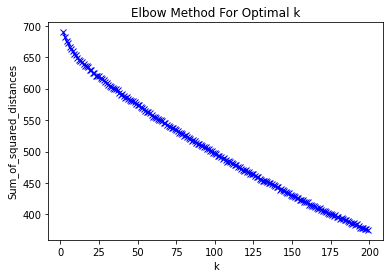

In [97]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<ipython-input-98-21279ff466ff>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(111)


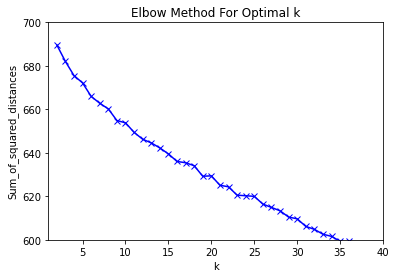

In [98]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
ax=plt.subplot(111)
ax.set_xlim(1, 40)
ax.set_ylim(600, 700)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [99]:
c1rows = df.loc[df['Cluster__1'] == 1]
c1rows

,Cluster__0,Cluster__1,Cluster__2,Cluster__3,Cluster__4,Cluster__5,Cluster__6,Cluster__7,Cluster__8,Cluster__9,...,financeUsers,eCommerceUsers,sellingGoodsUsers,iotUsers,population,state_funds,fed_funds,total_spent,per_capita,cluster
9,0,1,0,0,0,0,0,0,0,0,...,2076030,2257141,289569,411641,4887681,15524,9911,25435,5218,1
10,0,1,0,0,0,0,0,0,0,0,...,1833496,1828824,242328,219581,4874486,15524,9911,25435,5218,1
20,0,1,0,0,0,0,0,0,0,0,...,303622,334616,52012,38827,4874486,15524,9911,25435,5218,1
21,0,1,0,0,0,0,0,0,0,0,...,303622,334616,52012,38827,4874486,15524,9911,25435,5218,1
24,0,1,0,0,0,0,0,0,0,0,...,3796883,3752735,615933,1098903,4903185,15524,9911,25435,5218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0,1,0,0,0,0,0,0,0,0,...,258582,295264,30902,45832,4887681,15524,9911,25435,5218,1
841,0,1,0,0,0,0,0,0,0,0,...,258582,295264,30902,45832,4887681,15524,9911,25435,5218,1
842,0,1,0,0,0,0,0,0,0,0,...,258582,295264,30902,45832,4887681,15524,9911,25435,5218,1
843,0,1,0,0,0,0,0,0,0,0,...,258582,295264,30902,45832,4887681,15524,9911,25435,5218,1
